In [78]:
# Instalar bibliotecas necessárias
import pdfplumber
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize  



In [79]:
nltk.download('punkt')        # Tokenizador básico
nltk.download('punkt_tab')    # Tabelas de regras específicas para pontuação
nltk.download('stopwords')    # Palavras irrelevantes (opcional, mas recomendado)



[nltk_data] Downloading package punkt to /home/ajr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/ajr/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ajr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [80]:
# Baixar recursos do NLTK
nltk.download('punkt')

# Caminho para o livro em PDF
pdf_path = "Harry-Potter.pdf"

# Extrair texto do PDF
with pdfplumber.open(pdf_path) as pdf:
    text = ""
    for page in pdf.pages:
        text += page.extract_text()

# Pré-processar o texto
# Tokenizar o texto em palavras
sentences = [word_tokenize(sentence.lower()) for sentence in sent_tokenize(text) if sentence.strip()]
# Treinar o modelo Word2Vec
model = Word2Vec(sentences, vector_size=200, window=5, min_count=5, sg=1, epochs=20, workers=4)


[nltk_data] Downloading package punkt to /home/ajr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [81]:
model.wv['harry']

array([ 4.69196327e-02, -1.33553639e-01, -1.82027981e-01,  5.55429570e-02,
        8.12195241e-02,  1.21928819e-01, -1.28442287e-01,  2.25190803e-01,
        1.65948346e-01,  5.60998693e-02, -8.13525915e-02, -3.19238573e-01,
        7.27152899e-02,  6.82287812e-02,  2.37477925e-02,  6.81734309e-02,
        1.25667468e-01,  2.92717457e-01,  3.52526531e-02, -2.71335930e-01,
        5.04320264e-01,  7.05193132e-02,  1.26672134e-01,  8.31446499e-02,
        1.28867701e-01,  6.97388500e-02,  1.10870026e-01, -1.43619701e-01,
       -1.98876262e-01, -1.41766995e-01,  4.71817255e-02, -9.11993459e-02,
       -6.00979030e-02, -2.75141060e-01,  1.61527380e-01, -4.91474234e-02,
       -4.58574966e-02,  1.82274699e-01,  2.15149336e-02, -4.75470871e-01,
       -2.46335268e-01, -2.04383492e-01, -2.40060285e-01,  1.35647088e-01,
        1.91203639e-01,  5.84494993e-02, -3.87303919e-01, -3.09649944e-01,
        1.64596200e-01,  2.96417803e-01, -9.87154245e-02, -6.12832010e-02,
       -1.39242247e-01,  

In [82]:
def get_word(word):
    try:
        return model.wv[word]
    except KeyError:
        print("The word '"+word+"' does not appear in this model")

In [83]:
get_word("Obama")

The word 'Obama' does not appear in this model


In [84]:
len(model.wv)

1887

In [85]:
model.wv.index_to_key

[',',
 '’',
 '.',
 'the',
 '‘',
 'and',
 'to',
 'a',
 'harry',
 'of',
 'he',
 'was',
 's',
 'said',
 'it',
 'his',
 'you',
 'in',
 'i',
 't',
 '?',
 'ron',
 'that',
 'at',
 'had',
 '–',
 'on',
 'as',
 '!',
 'they',
 '...',
 'with',
 'him',
 'but',
 'for',
 'what',
 'out',
 'be',
 'all',
 'up',
 'them',
 'were',
 'we',
 'hermione',
 'from',
 'into',
 'there',
 'her',
 'have',
 'back',
 'been',
 'she',
 'not',
 'potter',
 'this',
 'who',
 'lockhart',
 'me',
 'so',
 'no',
 'one',
 'is',
 'if',
 'd',
 'malfoy',
 'could',
 've',
 'over',
 'their',
 'my',
 'professor',
 'got',
 'an',
 'about',
 'by',
 'just',
 'll',
 'like',
 'off',
 'down',
 'when',
 'weasley',
 'know',
 'through',
 'can',
 'very',
 'now',
 'hagrid',
 'then',
 'dumbledore',
 'looked',
 'didn',
 'dobby',
 'around',
 'go',
 ';',
 'see',
 'don',
 're',
 'your',
 'think',
 'would',
 'eyes',
 'do',
 'time',
 'get',
 'more',
 'riddle',
 'how',
 'face',
 'mr',
 'right',
 'still',
 'look',
 'door',
 'come',
 'ginny',
 'head',
 'nev

In [115]:
# Salvar o modelo treinado
model.save("models/harry_potter_word2vec.model")
#model = Word2Vec.load("models/harry_potter_word2vec.model")

In [116]:
# Store just the words + their trained embeddings.

from gensim.models import KeyedVectors

word_vectors = model.wv
word_vectors.save("models/harry_potter_word2vec.wordvectors")

wv = KeyedVectors.load("models/harry_potter_word2vec.wordvectors")


In [117]:
word_vectors.save_word2vec_format('models/vectors.txt', binary=False)
word_vectors.save_word2vec_format('models/vectors.bin', binary=True)

In [118]:
model_txt = KeyedVectors.load_word2vec_format('models/vectors.txt', binary=False)
model_bin = KeyedVectors.load_word2vec_format('models/vectors.bin', binary=True)

In [120]:
wv.most_similar('magic', topn=10)

[('use', 0.69903564453125),
 ('ministry', 0.6634753346443176),
 ('history', 0.640248715877533),
 ('rid', 0.6318525671958923),
 ('section', 0.6244798302650452),
 ('allowed', 0.623868465423584),
 ('mandrake', 0.6085973978042603),
 ('muggle', 0.6041334271430969),
 ('notice', 0.6039908528327942),
 ('world', 0.5955867767333984)]

In [ ]:
print(wv.similarity("harry","magic"))
print(wv.similarity("dead","woman"))
print(wv.similarity("house","hogwarts"))

0.121169016
0.2349964
0.4380892


In [ ]:
pairs = [
    ('magic', 'voldemort'),   
    ('magic', 'ron'),  
    ('magic', 'secrets'),  
    ('magic', 'dead'),  
    ('magic', 'car'),
]
for w1, w2 in pairs:
    print('%s \t %s \t% .2f' % (w1, w2, wv.similarity(w1, w2)))

magic 	 voldemort 	 0.36
magic 	 ron 	 0.17
magic 	 secrets 	 0.37
magic 	 dead 	 0.23
magic 	 car 	 0.39


In [ ]:
wv.doesnt_match(["cake","magic","hogwarts"])

'magic'

In [ ]:
wv.doesnt_match(["voldemort","ron","harry","hermione"])

'voldemort'

In [ ]:
wv.doesnt_match(["school","professor","dead"])

'school'

In [ ]:
result = wv.most_similar(positive=['woman', 'dad'], negative=['man'])
print(result[0])

('mum', 0.6673814058303833)


In [ ]:
result = wv.most_similar(positive=['person', 'wizard'], negative=['magic'])
print(result[0])

('different', 0.5781535506248474)


In [ ]:
def analogy( x2, y1, x1):
    result = wv.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [ ]:
analogy('wizard', 'bad', 'magic')

'speaking'

In [ ]:
analogy('friend', 'harry', 'good')

'slightly'

# Visualisation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def display_pca_scatterplot(model, words=None):
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

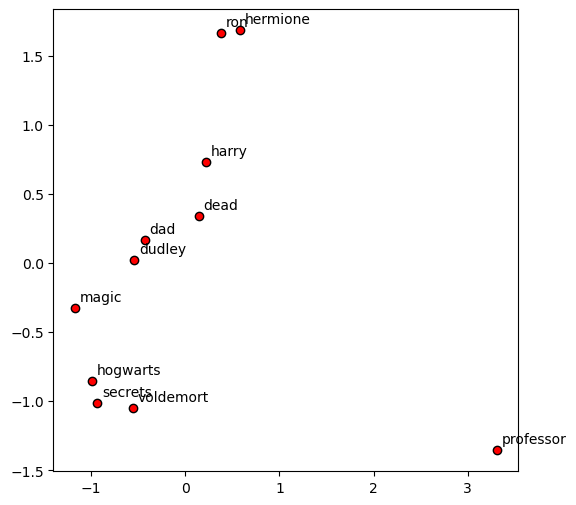

In [ ]:
words =  ['dead', 'magic', 'ron', 'hermione', 'harry', 'voldemort', 'hogwarts', 'secrets',
           'professor', 'dad', 'dudley']
display_pca_scatterplot(wv,words)

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

def display_closestwords_tsnescatterplot(model, words):
    arr = np.empty((0, model.vector_size))  # Inicializa com a dimensão correta
    word_labels = []
    
    for word in words:
        if word in model:  # Verifica se a palavra está no modelo
            wrd_vector = model[word]
            arr = np.append(arr, [wrd_vector], axis=0)
            word_labels.append(word)
    
    # Redução de dimensionalidade com TSNE
    tsne = TSNE(n_components=2, perplexity=10, n_iter=5000)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    
    # Plot
    plt.figure(figsize=(10, 8))
    plt.scatter(Y[:, 0], Y[:, 1])
    for label, x, y in zip(word_labels, Y[:, 0], Y[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.show()


/home/ajr/miniconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


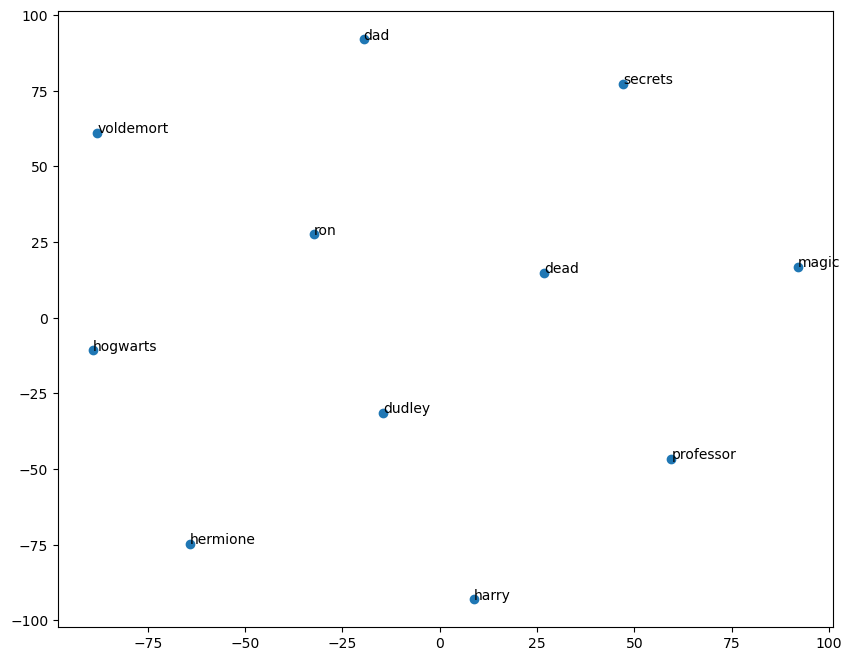

In [ ]:
display_closestwords_tsnescatterplot(wv, words)